In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [6]:
(X_train,y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape # There are 50000 samples in 1d array(in y_train there are labels)

(50000, 1)

In [10]:
y_train[:6]# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)# we put -1 becuse we dont want to change sample number it 50000 after -1,
y_train#there is blank means we just need this 1 d arry value in flatten format means 6 being array we want simple 6

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [12]:
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [13]:
y_test.shape

(10000, 1)

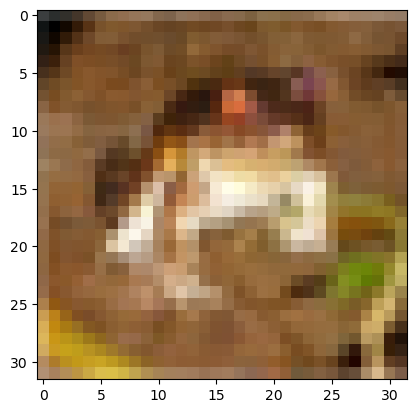

In [14]:
plt.imshow(X_train[0])

In [15]:
y_train[0]

6

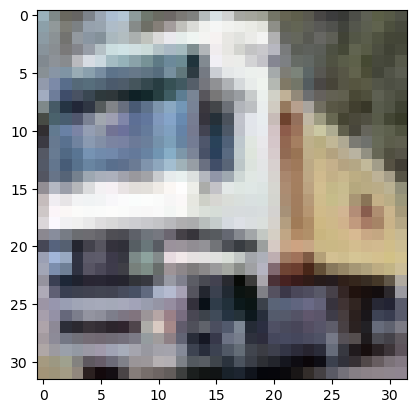

In [16]:
plt.imshow(X_train[1])

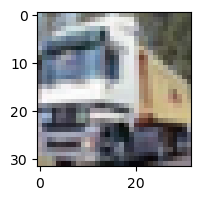

In [17]:
plt.figure(figsize = (15,2))#To get and show the image in smaller size
plt.imshow(X_train[1])

In [18]:
classes = ["airplan", "automobiles", "bird", "cat", "deer", "dog", "frog", "hourse", "ship", "truck"]

In [19]:
classes[6]

'frog'

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

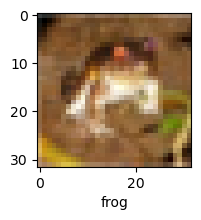

In [21]:
plot_sample(X_train, y_train, 0)

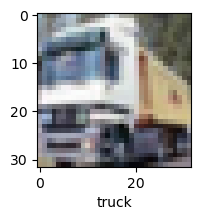

In [22]:
plot_sample(X_train, y_train, 1)

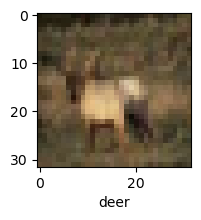

In [23]:
plot_sample(X_train, y_train, 3)

# Normalizing the data

In [24]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build simple artificial neural network for image classification

In [26]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 217s 133ms/step - loss: 1.8100 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 195s 125ms/step - loss: 1.6202 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 184s 118ms/step - loss: 1.5382 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 168s 107ms/step - loss: 1.4785 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 217s 139ms/step - loss: 1.4296 - accuracy: 0.4954


# You can see that at the end of 5 epochs, accuracy is at around 49%

In [28]:
pip install sklearn

ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/a4/0b/d1c703256cf293be77b7db44dbef62251fe02a97d0bef981f7120b0b0c0f/sklearn-0.0.post11.tar.gz (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))



In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

ModuleNotFoundError: No module named 'sklearn'

# Now let us build a convolutional neural network to train our images

In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 165s 102ms/step - loss: 1.4438 - accuracy: 0.4830
Epoch 2/10
1563/1563 [==============================] - 162s 104ms/step - loss: 1.0739 - accuracy: 0.6229
Epoch 3/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.9463 - accuracy: 0.6702
Epoch 4/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.8578 - accuracy: 0.7017
Epoch 5/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.7881 - accuracy: 0.7249
Epoch 6/10
1563/1563 [==============================] - 102s 66ms/step - loss: 0.7307 - accuracy: 0.7477
Epoch 7/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.6802 - accuracy: 0.7635
Epoch 8/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.6392 - accuracy: 0.7783
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6000 - accuracy: 0.7908
Epoch 10/10
1563/1563 [==============================] 

In [ ]:
#With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. 
#CNN's are best for image classification and gives superb accuracy. 
#Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [33]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 12s 31ms/step - loss: 0.9339 - accuracy: 0.6986


[0.93392413854599, 0.6985999941825867]

In [35]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 10s 31ms/step


array([[3.4077901e-05, 3.9930134e-03, 8.3533354e-04, 9.2695558e-01,
        1.9162688e-04, 4.5556404e-02, 2.0578394e-02, 4.2510223e-06,
        1.7717731e-03, 7.9551952e-05],
       [9.6214860e-04, 1.5840655e-02, 3.3530519e-06, 1.0303331e-06,
        4.0408359e-08, 7.3447741e-09, 9.6503491e-08, 3.1876276e-11,
        9.8239356e-01, 7.9900824e-04],
       [1.4551054e-01, 6.6581428e-02, 5.7905726e-03, 1.3504803e-02,
        2.7983468e-03, 1.0560196e-02, 2.3790324e-04, 4.1240188e-03,
        5.4686135e-01, 2.0403084e-01],
       [9.7306913e-01, 7.8088590e-03, 1.6244613e-03, 2.1274171e-03,
        7.0296088e-04, 1.8901295e-05, 4.9304037e-04, 9.1948736e-05,
        1.2845064e-02, 1.2183228e-03],
       [4.3280187e-07, 7.8359764e-05, 5.3170575e-03, 3.3368580e-02,
        2.0650238e-01, 4.6815616e-03, 7.5001663e-01, 1.3589421e-05,
        2.0882399e-05, 5.9085335e-07]], dtype=float32)

In [36]:
y_test = y_test.reshape(-1,)# we put -1 becuse we dont want to change sample number it 50000 after -1,
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [38]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 19ms/step


array([[3.4077901e-05, 3.9930134e-03, 8.3533354e-04, 9.2695558e-01,
        1.9162688e-04, 4.5556404e-02, 2.0578394e-02, 4.2510223e-06,
        1.7717731e-03, 7.9551952e-05],
       [9.6214860e-04, 1.5840655e-02, 3.3530519e-06, 1.0303331e-06,
        4.0408359e-08, 7.3447741e-09, 9.6503491e-08, 3.1876276e-11,
        9.8239356e-01, 7.9900824e-04],
       [1.4551054e-01, 6.6581428e-02, 5.7905726e-03, 1.3504803e-02,
        2.7983468e-03, 1.0560196e-02, 2.3790324e-04, 4.1240188e-03,
        5.4686135e-01, 2.0403084e-01],
       [9.7306913e-01, 7.8088590e-03, 1.6244613e-03, 2.1274171e-03,
        7.0296088e-04, 1.8901295e-05, 4.9304037e-04, 9.1948736e-05,
        1.2845064e-02, 1.2183228e-03],
       [4.3280187e-07, 7.8359764e-05, 5.3170575e-03, 3.3368580e-02,
        2.0650238e-01, 4.6815616e-03, 7.5001663e-01, 1.3589421e-05,
        2.0882399e-05, 5.9085335e-07]], dtype=float32)

In [39]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [40]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

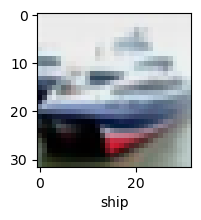

In [43]:
plot_sample(X_test, y_test,1)#Actual Value

In [44]:
classes

['airplan',
 'automobiles',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'hourse',
 'ship',
 'truck']

In [45]:
classes[y_classes[1]]#predicted value

'ship'

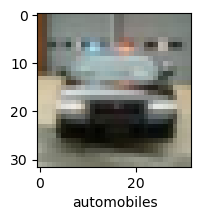

In [46]:
plot_sample(X_test, y_test,66)#Actual Value

In [47]:
classes[y_classes[66]]#predicted value

'automobiles'